## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [5]:
import pandas as pd

df = pd.read_csv('Resources/client_dataset.csv')
df.head()

,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1


In [ ]:
# View the column names in the data
df.columns


Index(['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id',
       'order_date', 'order_week', 'order_year', 'item_id', 'category',
       'subcategory', 'unit_price', 'unit_cost', 'unit_weight', 'qty',
       'line_number'],
      dtype='object')

In [ ]:
# Use the describe function to gather some basic statistics
print(df.describe())

          client_id      order_id    order_week    order_year    unit_price  \
count  54639.000000  5.463900e+04  54639.000000  54639.000000  54639.000000   
mean   54837.869416  5.470190e+06     11.359139   2022.993064    136.267207   
std    25487.438231  2.599807e+06      7.023499      0.082997    183.873135   
min    10033.000000  1.000886e+06      1.000000   2022.000000      0.010000   
25%    33593.000000  3.196372e+06      6.000000   2023.000000     20.800000   
50%    53305.000000  5.496966e+06     11.000000   2023.000000     68.310000   
75%    78498.000000  7.733869e+06     17.000000   2023.000000    173.160000   
max    99984.000000  9.998480e+06     52.000000   2023.000000   1396.230000   

          unit_cost   unit_weight           qty   line_number  
count  54639.000000  54639.000000  5.463900e+04  54639.000000  
mean      99.446073      5.004116  5.702646e+02      2.979667  
std      133.164267      5.326599  1.879552e+04      2.436320  
min        0.010000      0.00000

In [ ]:
# Use this space to do any additional research
# and familiarize yourself with the data.
print(df.dtypes)


first           object
last            object
job             object
phone           object
email           object
client_id        int64
order_id         int64
order_date      object
order_week       int64
order_year       int64
item_id         object
category        object
subcategory     object
unit_price     float64
unit_cost      float64
unit_weight    float64
qty              int64
line_number      int64
dtype: object


In [9]:
# What three item categories had the most entries?
category_counts = df['category'].value_counts()

top_three_categories = category_counts.head(3)
print(top_three_categories)


category
consumables    23538
furniture      11915
software        8400
Name: count, dtype: int64


In [10]:
# For the category with the most entries, which subcategory had the most entries?
top_category = df['category'].value_counts().idxmax()
top_category_df = df[df['category'] == top_category]
subcategory_counts = top_category_df['subcategory'].value_counts()
top_subcategory = subcategory_counts.idxmax()
top_subcategory_count = subcategory_counts.head(1)
print(top_subcategory_count)

subcategory
bathroom supplies    6424
Name: count, dtype: int64


In [11]:
# Which five clients had the most entries in the data?
clients = df['client_id'].value_counts()

top_five_entries = clients.head(5)
print(top_five_entries)


client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64


In [12]:
# Store the client ids of those top 5 clients in a list.
client_counts = df['client_id'].value_counts()
top_five_clients = client_counts.head(5)
top_five_clients_ids = top_five_clients.index.tolist()
print(top_five_clients_ids)

[33615, 66037, 46820, 38378, 24741]


In [13]:
# How many total units (the qty column) did the client with the most entries order order?
client_counts = df['client_id'].value_counts()
top_client = client_counts.idxmax()
top_client_df = df[df['client_id'] == top_client]
total_units_ordered = top_client_df['qty'].sum()
print(total_units_ordered)

64313


## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

In [14]:
# Create a column that calculates the subtotal for each line using the unit_price and the qty
df['line_subtotal'] = df['unit_price'] * df['qty']
print(df[['unit_price', 'qty', 'line_subtotal']].head(2))


   unit_price  qty  line_subtotal
0     1096.80  105      115164.00
1       24.95   21         523.95


In [15]:
# Create a column for shipping price.
df['total_weight'] = df['unit_weight'] * df['qty']

# Assume a shipping price of $7 per pound for orders over 50 pounds and $10 per pound for items 50 pounds or under.
def calculate_shipping(weight):
    if weight > 50:
        return weight * 7  # $7 per pound for orders over 50 pounds
    else:
        return weight * 10  # $10 per pound for orders 50 pounds or under
    
# Apply the function to create the shipping price column
df['shipping_price'] = df['total_weight'].apply(calculate_shipping)

# Display the updated DataFrame with the new 'shipping_price' column
print(df[['unit_price', 'unit_weight', 'qty', 'total_weight', 'shipping_price']].head(3))



   unit_price  unit_weight  qty  total_weight  shipping_price
0     1096.80         7.50  105        787.50         5512.50
1       24.95         1.49   21         31.29          312.90
2       13.52         1.68   39         65.52          458.64


In [ ]:
# Create a column for the total price using the subtotal and the shipping price along with a sales tax of 9.25%
sales_tax = 0.0925
df['line_price'] = (df['line_subtotal'] + df['shipping_price']) * (1 + sales_tax)
df['total_price'] = (df['line_price'] + df['shipping_price']) * (1 + sales_tax)

pd.options.display.float_format = '{:.2f}'.format


print(df[['line_subtotal', 'shipping_price', 'line_price', 'total_price']].head(3))


   line_subtotal  shipping_price  line_price  total_price
0      115164.00         5512.50   131839.08    150056.60
1         523.95          312.90      914.26      1340.67
2         527.28          458.64     1077.12      1677.82


In [17]:
# Create a column for the cost of each line using unit cost, qty, and
# shipping price (assume the shipping cost is exactly what is charged to the client).
df['total_cost'] = (df['unit_cost'] * df['qty']) + df['shipping_price']
print(df[['unit_cost', 'qty', 'shipping_price', 'total_cost']].head(3))



   unit_cost  qty  shipping_price  total_cost
0     762.71  105         5512.50    85597.05
1      15.09   21          312.90      629.79
2       7.86   39          458.64      765.18


In [18]:
# Create a column for the profit of each line using line cost and line price
df['profit'] = df['line_subtotal'] - df['total_cost']

print(df[['line_subtotal', 'total_cost', 'profit']].head(3))
# print(df.columns)

   line_subtotal  total_cost   profit
0      115164.00    85597.05 29566.95
1         523.95      629.79  -105.84
2         527.28      765.18  -237.90


## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


In [97]:
# Check your work using the totals above
order_totals = df.groupby('order_id')['line_price'].sum()

specific_order_ids = [2742071, 2173913, 6128929]

filtered_order_totals = order_totals[order_totals.index.isin(specific_order_ids)]

for order_id in specific_order_ids:
    if order_id in filtered_order_totals:
        line_price = filtered_order_totals[order_id]
        print(f"Order {order_id} total: ${line_price:.2f}")

Order 2742071 total: $152811.90
Order 2173913 total: $162388.72
Order 6128929 total: $923441.24


## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

In [20]:
# How much did each of the top 5 clients by quantity spend? Check your work from Part 1 for client ids.



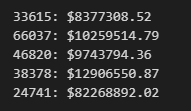

In [21]:
# Create a summary DataFrame showing the totals for the for the top 5 clients with the following information:
# total units purchased, total shipping price, total revenue, and total profit. 


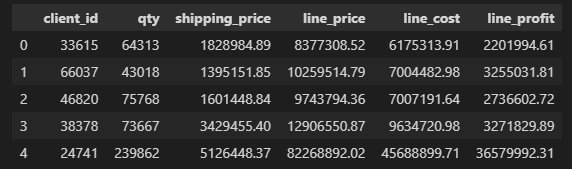

In [22]:
# Format the data and rename the columns to names suitable for presentation.

# Define the money columns. 


# Define a function that converts a dollar amount to millions.


# Apply the currency_format_millions function to only the money columns. 


# Rename the columns to reflect the change in the money format. 




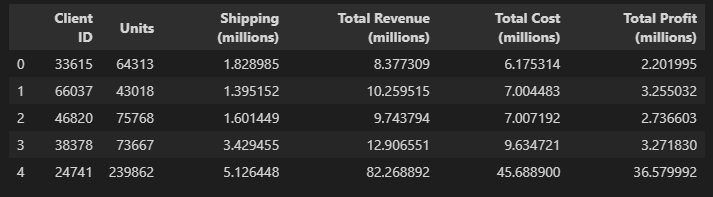

In [23]:
# Sort the updated data by "Total Profit (millions)" form highest to lowest and assign the sort to a new DatFrame.


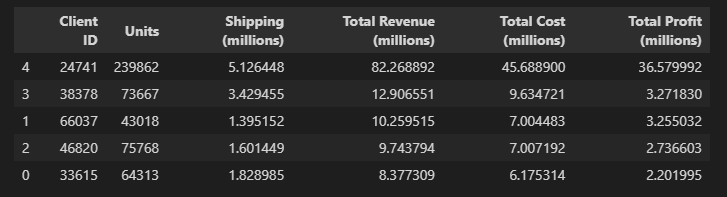